In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/task_3.jpg')

In [3]:
print(img)

[[[33 17 18]
  [33 17 18]
  [34 18 19]
  ...
  [32 16 17]
  [34 16 17]
  [35 17 18]]

 [[34 18 19]
  [33 17 18]
  [34 18 19]
  ...
  [33 17 18]
  [34 16 17]
  [35 17 18]]

 [[32 18 19]
  [31 17 18]
  [31 17 18]
  ...
  [33 17 18]
  [35 17 18]
  [35 17 18]]

 ...

 [[22 11  7]
  [22 11  7]
  [23 12  8]
  ...
  [22 10  8]
  [22 10  8]
  [23 11  9]]

 [[22 11  7]
  [22 11  7]
  [22 11  7]
  ...
  [22 10  8]
  [22 11  7]
  [22 11  7]]

 [[22 11  7]
  [21 10  6]
  [20  9  5]
  ...
  [22 10  8]
  [20  9  5]
  [20  9  5]]]


In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

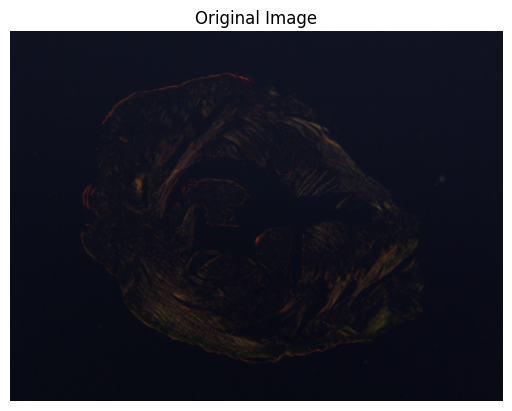

In [5]:
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

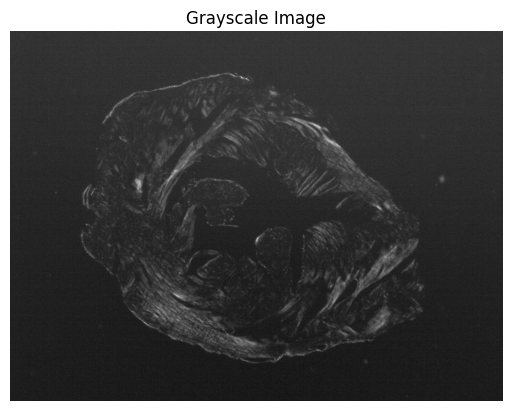

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

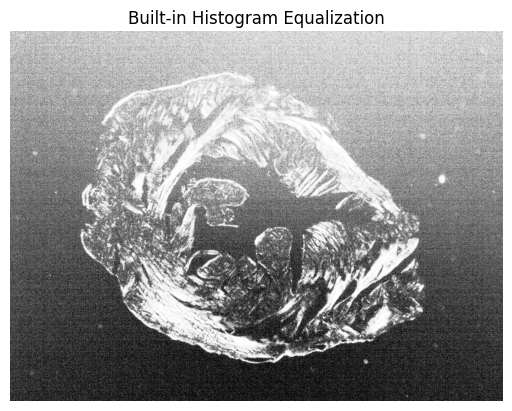

In [7]:
equal_builtin = cv2.equalizeHist(gray)

plt.imshow(equal_builtin, cmap='gray')
plt.title("Built-in Histogram Equalization")
plt.axis("off")
plt.show()

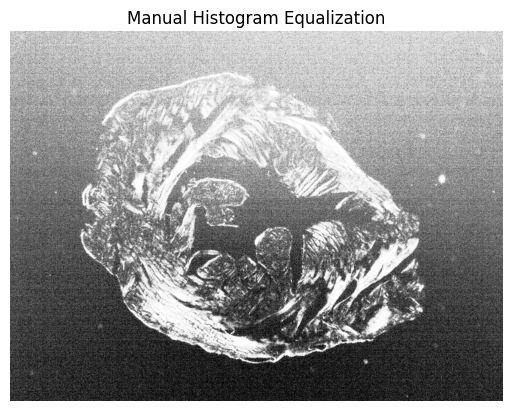

In [8]:
def my_histogram_equalization(img):
    # Step 1: Find histogram
    hist, _ = np.histogram(img.flatten(), 256, [0,256])

    # Step 2: Compute CDF
    cdf = hist.cumsum()

    # Step 3: Normalize CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Step 4: Map old values to new values using CDF
    equalized_img = cdf_normalized[img.astype('uint8')]

    return equalized_img

equal_manual = my_histogram_equalization(gray)

plt.imshow(equal_manual, cmap='gray')
plt.title("Manual Histogram Equalization")
plt.axis("off")
plt.show()

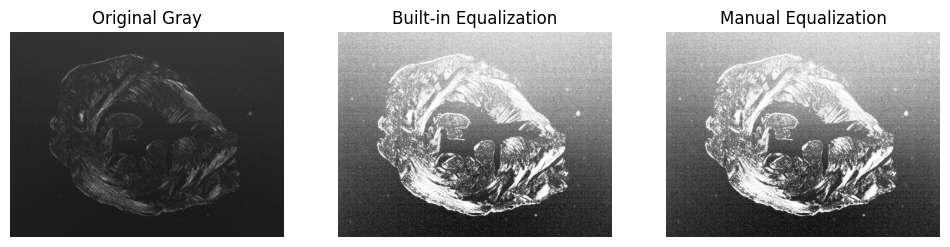

In [9]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equal_builtin, cmap='gray')
plt.title("Built-in Equalization")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(equal_manual, cmap='gray')
plt.title("Manual Equalization")
plt.axis("off")

plt.show()

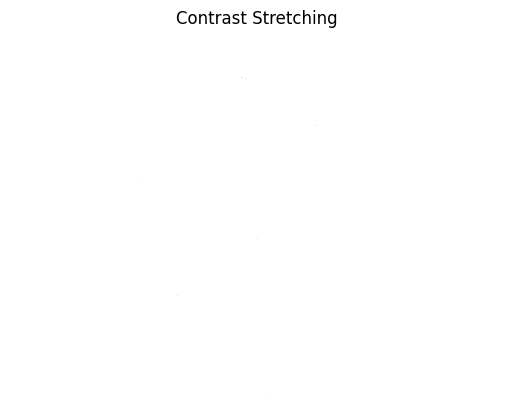

In [10]:
# 3) CONTRAST STRETCHING
# ----------------------------------------------------
def contrast_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * 255 / (max_val - min_val)
    return stretched.astype('uint8')

contrast_img = contrast_stretch(gray)

plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis("off")
plt.show()

In [11]:
# 4) DIFFERENT TRANSFORMATION FUNCTIONS
# ----------------------------------------------------

# a) Log Transformation
log_img = (255 / np.log(1 + np.max(gray))) * np.log(1 + gray)
log_img = log_img.astype('uint8')

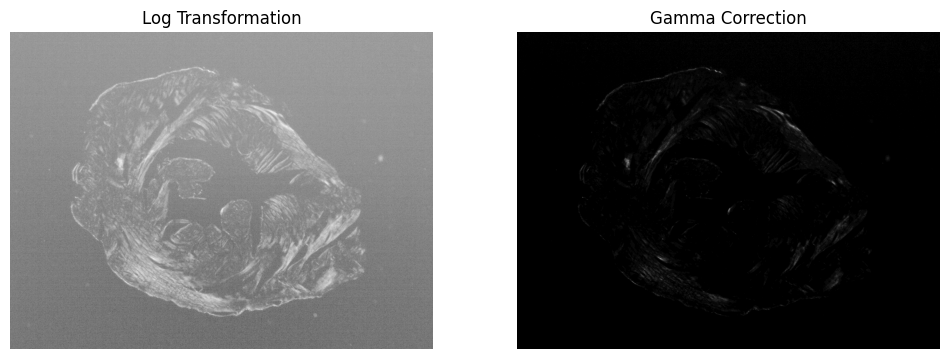

In [12]:
# b) Gamma Correction
gamma = 2.2
gamma_img = np.array(255 * (gray / 255) ** gamma, dtype='uint8')

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(log_img, cmap='gray')
plt.title("Log Transformation")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_img, cmap='gray')
plt.title("Gamma Correction")
plt.axis("off")

plt.show()

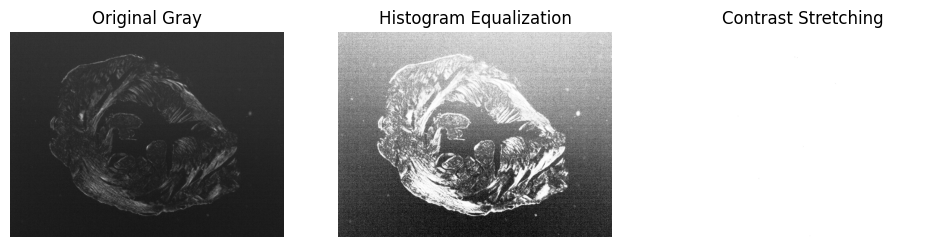

In [13]:
# 5) COMPARE: HIST EQUALIZATION vs CONTRAST STRETCHING
# ----------------------------------------------------
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equal_builtin, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis("off")

plt.show()